<a href="https://colab.research.google.com/github/AlumiK/tensorflow2-notebooks/blob/main/05%20Natural%20Language%20Processing/14_cnn_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
!wget -nc 'https://lazyprogrammer.me/course_files/spam.csv'

df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

X = df['v2'].values
y = df['v1'].map({'ham': 0, 'spam': 1}).values
X_train_texts, X_test_texts, y_train, y_test = train_test_split(X, y, test_size=0.33)

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=20000)
tokenizer.fit_on_texts(X_train_texts)
X_train = tokenizer.texts_to_sequences(X_train_texts)
X_test = tokenizer.texts_to_sequences(X_test_texts)

V = len(tokenizer.word_index)

X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train)
T = X_train.shape[1]
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=T)

D = 20

--2020-10-09 04:18:43--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.81.48, 172.67.213.166, 104.31.80.48, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.81.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.02s   

2020-10-09 04:18:43 (26.2 MB/s) - ‘spam.csv’ saved [503663/503663]



Epoch 1/5
117/117 [==============================] - 2s 16ms/step - loss: 0.3710 - accuracy: 0.8722 - val_loss: 0.2586 - val_accuracy: 0.8532
Epoch 2/5
117/117 [==============================] - 2s 15ms/step - loss: 0.0740 - accuracy: 0.9772 - val_loss: 0.0622 - val_accuracy: 0.9837
Epoch 3/5
117/117 [==============================] - 2s 16ms/step - loss: 0.0122 - accuracy: 0.9965 - val_loss: 0.0786 - val_accuracy: 0.9815
Epoch 4/5
117/117 [==============================] - 2s 16ms/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.0787 - val_accuracy: 0.9842
Epoch 5/5
117/117 [==============================] - 2s 15ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0746 - val_accuracy: 0.9869


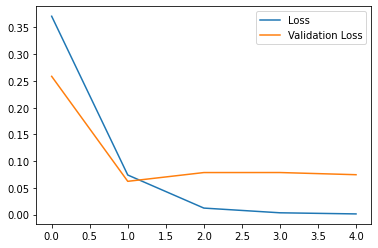

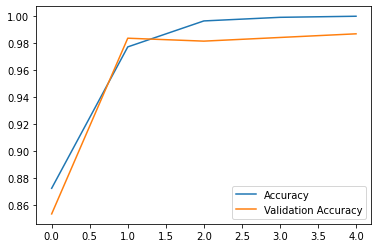

58/58 [==============================] - 0s 4ms/step - loss: 0.0746 - accuracy: 0.9869
Accuracy: 0.9869494438171387


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(T,)),
    tf.keras.layers.Embedding(V + 1, D),
    tf.keras.layers.Conv1D(32, 3, activation='relu'),
    tf.keras.layers.MaxPool1D(3),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.MaxPool1D(3),
    tf.keras.layers.Conv1D(128, 3, activation='relu'),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

plt.plot(r.history.get('loss'), label='Loss')
plt.plot(r.history.get('val_loss'), label='Validation Loss')
plt.legend()
plt.show()

plt.plot(r.history.get('accuracy'), label='Accuracy')
plt.plot(r.history.get('val_accuracy'), label='Validation Accuracy')
plt.legend()
plt.show()

print(f'Accuracy: {model.evaluate(X_test, y_test)[1]}')

In [ ]:
labels = ['Ham', 'Spam']
p_test = np.rint(model.predict(X_test).flatten()).astype(np.int)
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
print(f'Sentence: {X_test_texts[i]}')
print(f'Truth: {labels[y_test[i]]}')
print(f'Predicted: {labels[p_test[i]]}')

Sentence: Sorry I missed your call let's talk when you have the time. I'm on 07090201529
Truth: Spam
Predicted: Ham
